In [1]:
from pprint import pprint

import pystatis

# CorrelAid

https://www.correlaid.org/en/about/

## Our Mission

CorrelAid is a **non-profit community of data science enthusiasts** who want to change the world using data science. We dedicate our work to the humans, initiatives and organizations that strive to make the world a better place.

We value open knowledge management and transparency in our work wherever possible while complying with GDPR regulations and following strong principles of data ethics.

## Our Work

Our work is based on three pillars:

1. **Using data**: We enable data analysts and scientists to apply their knowledge for the common good and social organizations to increase their impact on society by **conducting pro-bono data for good (Data4Good) projects** and providing consulting on data topics.
2. **Education**: We strongly believe in sharing our knowledge. It is not for nothing that we have chosen "education" as our association's official purpose. This is why we offer numerous education formats for nonprofits and volunteers. In addition, we share our knowledge, code, and materials publicly.
3. **Community**: Our community is the basis of our work. We unite data scientists of different backgrounds and experience levels. We organize ourselves both online and on-site within our CorrelAidX local groups.

# Pystatis presentation

`pystatis` is a small Python library to conveniently wrap the different GENESIS web services (APIs) in a centralized and user-friendly manner.

It allows users to browse the different databases and download the desired tables from all supported databases in a convenient `pandas` `DataFrame` object, suited for further analysis.

## Setup

We won't cover the initial only-once setup here because the user has to enter their credentials for the supported databases (GENESIS, Regionalstatistik, Zensus). But there is a dedicated notebook [Setup](./00_Setup.ipynb) with examples and explanations.

## Main Use Cases

### Find

`pystatis.Find` allows a user to use a keyword to browse the data available on the chosen database. Finds 3 different objects:
- Tables: the tables containing the relevant keyword in title
- Statistics: statistics is the larger collections of tables on the topic, finds the ones with keyword in title
- Variables: variables are the values (DE: Merkmal) in columns of the tables, find ones with keyword in label

Returns the titles of relevant tables/statistics/variables and their [EVAS](https://www.destatis.de/DE/Service/Bibliothek/Abloesung-Fachserien/uebersicht-fs.html) number – useful tool to look these up (EVAS is necessary for the Table method)

1. call Find using a keyword `query=<keyword>` and specifying a database `db_name=<genesis|zensus|regio>`
2. actually query the API and print the results using `.run()`
3. access the various objects, their EVAS numbers, or preview using metadata

In [2]:
results = pystatis.Find(query="Abfall", db_name="regio")
results.run()

##### Results #####
----------------------------------------
# Number of tables: 5
# Preview:
|    | Code            | Content                                                                                    | Time   |
|---:|:----------------|:-------------------------------------------------------------------------------------------|:-------|
|  0 | 32121-01-02-4   | Haushaltsabfälle - Jahr - regionale Tiefe: Kreise und krfr. Städte                         |        |
|  1 | 32121-01-02-4-B | Haushaltsabfälle - Jahr - regionale Ebenen                                                 |        |
|  2 | 32151-01-01-4   | Primär nachgewiesene Abfallmengen - Jahressumme - regionale Tiefe: Kreise und krfr. Städte |        |
|  3 | 32151-01-01-4-B | Primär nachgewiesene Abfallmengen - Jahressumme - regionale Ebenen                         |        |
|  4 | AI019           | Regionalatlas Deutschland Themenbereich "Umwelt" Indikatoren zu "Haushaltsabfälle"         |        |
-----------------

If interested in specific object, can run `results.tables`, `results.statistics`, or `results.variables` directly.

In [5]:
results.tables

|    | Code            | Content                                                                                    | Time   |
|---:|:----------------|:-------------------------------------------------------------------------------------------|:-------|
|  0 | 32121-01-02-4   | Haushaltsabfälle - Jahr - regionale Tiefe: Kreise und krfr. Städte                         |        |
|  1 | 32121-01-02-4-B | Haushaltsabfälle - Jahr - regionale Ebenen                                                 |        |
|  2 | 32151-01-01-4   | Primär nachgewiesene Abfallmengen - Jahressumme - regionale Tiefe: Kreise und krfr. Städte |        |
|  3 | 32151-01-01-4-B | Primär nachgewiesene Abfallmengen - Jahressumme - regionale Ebenen                         |        |
|  4 | AI019           | Regionalatlas Deutschland Themenbereich "Umwelt" Indikatoren zu "Haushaltsabfälle"         |        |

Add `.df` to convert to a dataframe for easier handling.

In [6]:
results.tables.df

,Code,Content,Time
0,32121-01-02-4,Haushaltsabfälle - Jahr - regionale Tiefe: Kreise und krfr. Städte,
1,32121-01-02-4-B,Haushaltsabfälle - Jahr - regionale Ebenen,
2,32151-01-01-4,Primär nachgewiesene Abfallmengen - Jahressumme - regionale Tiefe: Kreise und krfr. Städte,
3,32151-01-01-4-B,Primär nachgewiesene Abfallmengen - Jahressumme - regionale Ebenen,
4,AI019,"Regionalatlas Deutschland Themenbereich ""Umwelt"" Indikatoren zu ""Haushaltsabfälle""",


We can then access the relevant codes with `.get_code([#])`. Doing this returns a list of codes from specified rows which may be useful to run in the Table method.

In [7]:
results.tables.get_code([0, 1, 2])

['32121-01-02-4', '32121-01-02-4-B', '32151-01-01-4']

To then check that the object has the relevant data, we can preview the columns using the `.meta_data()` method.

In [8]:
results.tables.get_metadata([1, 2])

TABLES 32121-01-02-4-B - 1
Name:
Erhebung der öffentlich-rechtlichen Abfallentsorgung
--------------------
Columns:
Aufkommen an Haushaltsabfällen (oh.Elektroaltger.)
--------------------
Rows:
Kreise und kreisfreie Städte
----------------------------------------
TABLES 32151-01-01-4 - 2
Name:
Erhebung der gefährlichen Abfälle, über die Nachweise zu  führen sind 
--------------------
Columns:
Erzeuger von primär nachgewiesenen Abfallmengen
Abgegebene Abfallmenge an Entsorger
--------------------
Rows:
Kreise und kreisfreie Städte
----------------------------------------


The `pystatis.Find` is a useful search tool to browse the database by any keyword. It is quicker than downloading a table and does not need the EVAS number to run.

Use this to identify the tables of interest and to look up their EVAS as to use in the further analysis with a `pystatis.Table` method.

### Table

`pystatis.Table` offers a simple Interface to get any table via its "name" ([EVAS](https://www.destatis.de/DE/Service/Bibliothek/Abloesung-Fachserien/uebersicht-fs.html) number).

1. Create a new Table instance by passing `name=<EVAS>`
2. Download the actual data with `.get_data(prettify=<True|False>)`
3. Access data via either `.raw_data` or `.data`, metadata via `.metadata`

In [9]:
# GENESIS - https://www-genesis.destatis.de/genesis//online?operation=table&code=31231-0001&bypass=true&levelindex=1&levelid=1706599948340#abreadcrumb
t = pystatis.Table(name="31231-0001")  #

Per default, `prettify` is set to `True` and will return a more readable format. Here we show the original format first.

In [10]:
t.get_data(prettify=False)

In [11]:
t.raw_data.splitlines()

['Statistik_Code;Statistik_Label;Zeit_Code;Zeit_Label;Zeit;1_Merkmal_Code;1_Merkmal_Label;1_Auspraegung_Code;1_Auspraegung_Label;WOH001__Wohnungen_in_Wohn-_und_Nichtwohngebaeuden__Anzahl;WOH004__Wohnungen_je_1000_Einwohner__Anzahl;FLC001__Wohnflaeche__1000_qm;FLC102__Wohnflaeche_je_Wohnung__qm;FLC103__Wohnflaeche_je_Einwohner__qm;RME001__Raeume__Anzahl;RME002__Raeume_je_Wohnung__Anzahl;RME003__Raeume_je_Einwohner__Anzahl',
 '31231;Fortschreibung Wohngebäude- und Wohnungsbestand;STAG;Stichtag;31.12.2015;DINSG;Deutschland insgesamt;DG;Deutschland;41446271;504;3794976;91,6;46,2;182295713;4,4;2,2',
 '31231;Fortschreibung Wohngebäude- und Wohnungsbestand;STAG;Stichtag;31.12.2016;DINSG;Deutschland insgesamt;DG;Deutschland;41703347;505;3822507;91,7;46,3;183354291;4,4;2,2',
 '31231;Fortschreibung Wohngebäude- und Wohnungsbestand;STAG;Stichtag;31.12.2017;DINSG;Deutschland insgesamt;DG;Deutschland;41968066;507;3850742;91,8;46,5;184427760;4,4;2,2',
 '31231;Fortschreibung Wohngebäude- und Wohnungs

In [12]:
t.data

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,1_Auspraegung_Code,1_Auspraegung_Label,WOH001__Wohnungen_in_Wohn-_und_Nichtwohngebaeuden__Anzahl,WOH004__Wohnungen_je_1000_Einwohner__Anzahl,FLC001__Wohnflaeche__1000_qm,FLC102__Wohnflaeche_je_Wohnung__qm,FLC103__Wohnflaeche_je_Einwohner__qm,RME001__Raeume__Anzahl,RME002__Raeume_je_Wohnung__Anzahl,RME003__Raeume_je_Einwohner__Anzahl
0,31231,Fortschreibung Wohngebäude- und Wohnungsbestand,STAG,Stichtag,31.12.2015,DINSG,Deutschland insgesamt,DG,Deutschland,41446271,504,3794976,"91,6","46,2",182295713,"4,4","2,2"
1,31231,Fortschreibung Wohngebäude- und Wohnungsbestand,STAG,Stichtag,31.12.2016,DINSG,Deutschland insgesamt,DG,Deutschland,41703347,505,3822507,"91,7","46,3",183354291,"4,4","2,2"
2,31231,Fortschreibung Wohngebäude- und Wohnungsbestand,STAG,Stichtag,31.12.2017,DINSG,Deutschland insgesamt,DG,Deutschland,41968066,507,3850742,"91,8","46,5",184427760,"4,4","2,2"
3,31231,Fortschreibung Wohngebäude- und Wohnungsbestand,STAG,Stichtag,31.12.2018,DINSG,Deutschland insgesamt,DG,Deutschland,42235402,509,3878901,"91,8","46,7",185491224,"4,4","2,2"
4,31231,Fortschreibung Wohngebäude- und Wohnungsbestand,STAG,Stichtag,31.12.2019,DINSG,Deutschland insgesamt,DG,Deutschland,42512771,511,3908347,"91,9","47,0",186594482,"4,4","2,2"
5,31231,Fortschreibung Wohngebäude- und Wohnungsbestand,STAG,Stichtag,31.12.2020,DINSG,Deutschland insgesamt,DG,Deutschland,42803737,515,3938871,"92,0","47,4",187746588,"4,4","2,3"
6,31231,Fortschreibung Wohngebäude- und Wohnungsbestand,STAG,Stichtag,31.12.2021,DINSG,Deutschland insgesamt,DG,Deutschland,43084122,518,3967765,"92,1","47,7",188829383,"4,4","2,3"
7,31231,Fortschreibung Wohngebäude- und Wohnungsbestand,STAG,Stichtag,31.12.2022,DINSG,Deutschland insgesamt,DG,Deutschland,43366919,514,3996995,"92,2","47,4",189920514,"4,4","2,3"


As you can see, the original format has a lot of redundant information and columns with metadata like the codes for the different variables. Let's rerun `get_data` with `prettify=True`.

In [13]:
t.get_data()

In [14]:
t.data

,Stichtag,Deutschland insgesamt,Wohnungen_in_Wohn-_und_Nichtwohngebaeuden,Wohnungen_je_1000_Einwohner,Wohnflaeche,Wohnflaeche_je_Wohnung,Wohnflaeche_je_Einwohner,Raeume,Raeume_je_Wohnung,Raeume_je_Einwohner
0,31.12.2015,Deutschland,41446271,504,3794976,"91,6","46,2",182295713,"4,4","2,2"
1,31.12.2016,Deutschland,41703347,505,3822507,"91,7","46,3",183354291,"4,4","2,2"
2,31.12.2017,Deutschland,41968066,507,3850742,"91,8","46,5",184427760,"4,4","2,2"
3,31.12.2018,Deutschland,42235402,509,3878901,"91,8","46,7",185491224,"4,4","2,2"
4,31.12.2019,Deutschland,42512771,511,3908347,"91,9","47,0",186594482,"4,4","2,2"
5,31.12.2020,Deutschland,42803737,515,3938871,"92,0","47,4",187746588,"4,4","2,3"
6,31.12.2021,Deutschland,43084122,518,3967765,"92,1","47,7",188829383,"4,4","2,3"
7,31.12.2022,Deutschland,43366919,514,3996995,"92,2","47,4",189920514,"4,4","2,3"


You can also access the metadata as returned by the Catalogue endpoint.

In [15]:
pprint(t.metadata)

{'Copyright': '© Statistisches Bundesamt (Destatis), 2024',
 'Ident': {'Method': 'table', 'Service': 'metadata'},
 'Object': {'Code': '31231-0001',
            'Content': 'Wohnungen in Wohn- und Nichtwohngebäuden, Wohnfläche, '
                       'Räume:\n'
                       'Deutschland, Stichtag',
            'Structure': {'Columns': [{'Code': 'WOH001',
                                       'Content': 'Wohnungen in Wohn- und '
                                                  'Nichtwohngebäuden',
                                       'Selected': None,
                                       'Structure': None,
                                       'Type': 'Merkmal',
                                       'Updated': 'see parent',
                                       'Values': None},
                                      {'Code': 'WOH004',
                                       'Content': 'Wohnungen je 1000 Einwohner',
                                       'Selected': None

You can use any EVAS number from the supported databases like GENESIS, Regionalstatistik or Zensus. The library identifies the database for you so you don't have to care about this.

In [16]:
# GENESIS
t = pystatis.Table(name="43311-0001")
t.get_data()
t.data

,Jahr,Deutschland insgesamt,Energieträger,Elektrizitaetserzeugung_(brutto),Elektrizitaetserzeugung_(netto),Nettowaermeerzeugung,Brennstoffeinsatz
0,2022,Deutschland,Steinkohlen,60759486.0,55443585.0,19106288.0,5.712968e+08
1,2022,Deutschland,Steinkohlenkoks,NaN,NaN,NaN,NaN
2,2022,Deutschland,Steinkohlenbriketts,NaN,NaN,NaN,NaN
3,2022,Deutschland,Kohlenwertstoffe aus Steinkohle,NaN,NaN,NaN,NaN
4,2022,Deutschland,Sonstige Steinkohlen,NaN,NaN,NaN,NaN
5,2022,Deutschland,Rohbraunkohlen,113611255.0,105943521.0,6558509.0,1.039784e+09
6,2022,Deutschland,Hartbraunkohlen,NaN,NaN,NaN,NaN
7,2022,Deutschland,Braunkohlenbriketts,43460.0,40444.0,NaN,4.102690e+05
8,2022,Deutschland,Braunkohlenkoks,NaN,NaN,NaN,NaN
9,2022,Deutschland,Wirbelschichtkohle,NaN,NaN,NaN,NaN


In [18]:
# Regionalstatistik
t = pystatis.Table(name="21311-01-01-4")
t.get_data()
t.data

/Users/miay/git/github/CorrelAid/pystatis/src/pystatis/table.py:46: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(


,Semester,Kreise und kreisfreie Städte,Geschlecht,Nationalität (inkl. insgesamt),Fächergruppe (mit Insgesamt),Kreise und kreisfreie Städte_Code,Geschlecht_Code,Nationalität (inkl. insgesamt)_Code,Fächergruppe (mit Insgesamt)_Code,Studierende_(im_Kreisgebiet)
0,WS 2021/22,Deutschland,Insgesamt,Insgesamt,Geisteswissenschaften,DG,INSGESAMT,INSGESAMT,HS-FG01,316442.0
1,WS 2021/22,Deutschland,Insgesamt,Insgesamt,Sport,DG,INSGESAMT,INSGESAMT,HS-FG02,31157.0
2,WS 2021/22,Deutschland,Insgesamt,Insgesamt,"Rechts-, Wirtschafts- und Sozialwissenschaften",DG,INSGESAMT,INSGESAMT,HS-FG03,1138785.0
3,WS 2021/22,Deutschland,Insgesamt,Insgesamt,Mathematik/Naturwissenschaften,DG,INSGESAMT,INSGESAMT,HS-FG04,314060.0
4,WS 2021/22,Deutschland,Insgesamt,Insgesamt,Humanmedizin/Gesundheitswissenschaften,DG,INSGESAMT,INSGESAMT,HS-FG05,196239.0
...,...,...,...,...,...,...,...,...,...,...
48415,WS 2021/22,"Altenburger Land, Landkreis",weiblich,Deutsche,"Agrar-, Forst- und Ernährungswissensch., Veterinär",16077,GESW,NATD,HS-FG07,NaN
48416,WS 2021/22,"Altenburger Land, Landkreis",weiblich,Deutsche,Ingenieurwissenschaften,16077,GESW,NATD,HS-FG08,NaN
48417,WS 2021/22,"Altenburger Land, Landkreis",weiblich,Deutsche,"Kunst, Kunstwissenschaft",16077,GESW,NATD,HS-FG09,NaN
48418,WS 2021/22,"Altenburger Land, Landkreis",weiblich,Deutsche,Außerhalb der Studienbereichsgliederung,16077,GESW,NATD,HS-FG10,NaN


In [19]:
# Zensus
t = pystatis.Table(name="2000S-1006")
t.get_data()
t.data

,Stichtag,Deutschland,Höchster Schulabschluss,Personen ab 15 Jahren
0,2011-05-09,Deutschland,Mittlerer Schulabschluss und gymnasiale Oberstufe,1
1,2011-05-09,Deutschland,Haupt-/ Volksschulabschluss,2
2,2011-05-09,Deutschland,Ohne Abschluss,4932710
3,2011-05-09,Deutschland,Insgesamt,6
4,2011-05-09,Deutschland,Allg./fachgebundene Hochschulreife (Abitur),1
5,2011-05-09,Deutschland,Fachhochschulreife,5531480
6,2011-05-09,Deutschland,Noch in schulischer Ausbildung,1691700
7,2011-05-09,Deutschland,Allg./fachgebundene Hochschulreife (Abitur),1
8,2011-05-09,Deutschland,Schüler/-innen der gymnasialen Oberstufe,1339490
9,2011-05-09,Deutschland,Realschul- oder gleichwertiger Abschluss,1


The `get_data()` method supports all parameters that you can pass to the API, like `startyear`, `endyear` or `timeslices`

In [20]:
# GENESIS
t = pystatis.Table(name="43311-0001")
t.get_data(startyear=2000)
t.data

,Jahr,Deutschland insgesamt,Energieträger,Elektrizitaetserzeugung_(brutto),Elektrizitaetserzeugung_(netto),Nettowaermeerzeugung,Brennstoffeinsatz
0,2002,Deutschland,Steinkohlen,121062371.0,111426568.0,NaN,1.081030e+09
1,2002,Deutschland,Steinkohlenkoks,NaN,NaN,NaN,NaN
2,2002,Deutschland,Steinkohlenbriketts,NaN,NaN,NaN,NaN
3,2002,Deutschland,Kohlenwertstoffe aus Steinkohle,NaN,NaN,NaN,NaN
4,2002,Deutschland,Sonstige Steinkohlen,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1087,2022,Deutschland,Wärme,346035.0,330543.0,1115125.0,8.318414e+06
1088,2022,Deutschland,Strom (Elektrokessel),NaN,NaN,NaN,NaN
1089,2022,Deutschland,Sonstige Energieträger,NaN,NaN,NaN,NaN
1090,2022,Deutschland,Andere Speicher,NaN,NaN,NaN,NaN


## Advanced features

- Caching
- Handling background jobs
- Cubes

## Jonas

Case study: international students in Germany
- time evolution
- regional differences (at the level of federal states)

In [24]:
# !pip install geopandas
# !pip install matplotlib

In [26]:
import geopandas
import pandas as pd
from matplotlib import pyplot as plt

### load data from Regionalstatistik

In [27]:
students = pystatis.Table(name="21311-01-01-4")

In [29]:
students.get_data(startyear=2015)

Die Tabelle ist zu groß, um direkt abgerufen zu werden. Es wird eine Verarbeitung im Hintergrund gestartet.
/Users/miay/git/github/CorrelAid/pystatis/src/pystatis/table.py:46: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(


### set proper column types

In [30]:
students.data["Kreise und kreisfreie Städte_Code"] = students.data[
    "Kreise und kreisfreie Städte_Code"
].astype(str)
students.data["Kreise und kreisfreie Städte_Code"]

0            DG
1            DG
2            DG
3            DG
4            DG
          ...  
338935    16077
338936    16077
338937    16077
338938    16077
338939    16077
Name: Kreise und kreisfreie Städte_Code, Length: 338940, dtype: object

In [31]:
students.data["Kreise und kreisfreie Städte_Code"] = students.data[
    "Kreise und kreisfreie Städte_Code"
].apply(lambda x: "0" + x if len(x) <= 1 else x)
students.data["Kreise und kreisfreie Städte_Code"]

0            DG
1            DG
2            DG
3            DG
4            DG
          ...  
338935    16077
338936    16077
338937    16077
338938    16077
338939    16077
Name: Kreise und kreisfreie Städte_Code, Length: 338940, dtype: object

In [32]:
students.data

,Semester,Kreise und kreisfreie Städte,Geschlecht,Nationalität (inkl. insgesamt),Fächergruppe (mit Insgesamt),Kreise und kreisfreie Städte_Code,Geschlecht_Code,Nationalität (inkl. insgesamt)_Code,Fächergruppe (mit Insgesamt)_Code,Studierende_(im_Kreisgebiet)
0,WS 2015/16,Deutschland,Insgesamt,Insgesamt,Geisteswissenschaften,DG,INSGESAMT,INSGESAMT,HS-FG01,339730.0
1,WS 2015/16,Deutschland,Insgesamt,Insgesamt,Sport,DG,INSGESAMT,INSGESAMT,HS-FG02,27771.0
2,WS 2015/16,Deutschland,Insgesamt,Insgesamt,"Rechts-, Wirtschafts- und Sozialwissenschaften",DG,INSGESAMT,INSGESAMT,HS-FG03,1006645.0
3,WS 2015/16,Deutschland,Insgesamt,Insgesamt,Mathematik/Naturwissenschaften,DG,INSGESAMT,INSGESAMT,HS-FG04,309194.0
4,WS 2015/16,Deutschland,Insgesamt,Insgesamt,Humanmedizin/Gesundheitswissenschaften,DG,INSGESAMT,INSGESAMT,HS-FG05,166331.0
...,...,...,...,...,...,...,...,...,...,...
338935,WS 2021/22,"Altenburger Land, Landkreis",weiblich,Deutsche,"Agrar-, Forst- und Ernährungswissensch., Veterinär",16077,GESW,NATD,HS-FG07,NaN
338936,WS 2021/22,"Altenburger Land, Landkreis",weiblich,Deutsche,Ingenieurwissenschaften,16077,GESW,NATD,HS-FG08,NaN
338937,WS 2021/22,"Altenburger Land, Landkreis",weiblich,Deutsche,"Kunst, Kunstwissenschaft",16077,GESW,NATD,HS-FG09,NaN
338938,WS 2021/22,"Altenburger Land, Landkreis",weiblich,Deutsche,Außerhalb der Studienbereichsgliederung,16077,GESW,NATD,HS-FG10,NaN


### determine ratio of international students per year and region

In [33]:
ratio_international = (
    students.data[
        (students.data.Geschlecht == "Insgesamt")
        & (students.data["Fächergruppe (mit Insgesamt)"] == "Insgesamt")
    ]
    .groupby(
        by=[
            "Kreise und kreisfreie Städte",
            "Kreise und kreisfreie Städte_Code",
            "Semester",
        ]
    )["Studierende_(im_Kreisgebiet)"]
    .apply(lambda x: x.iloc[1] / x.iloc[0] if x.count() == 3 else None)
)
ratio_international.rename("ratio_international", inplace=True)

ratio_international = pd.DataFrame(ratio_international)
ratio_international["year"] = [
    int(semester[3:7])
    for semester in ratio_international.index.get_level_values(2)
]

ratio_international

ratio_international  year
Kreise und kreisfreie Städte Kreise und kreisfreie Städte_Code Semester                             
      Aachen, Kreis          05354                             WS 2015/16                  NaN  2015
                                                               WS 2016/17                  NaN  2016
                                                               WS 2018/19                  NaN  2018
                                                               WS 2020/21                  NaN  2020
                             5354                              WS 2017/18                  NaN  2017
...                                                                                        ...   ...
Deutschland                  DG                                WS 2017/18             0.131665  2017
                                                               WS 2018/19             0.137599  2018
                                                               WS 2019/20             0.142371  2019
                                                               WS 2020/21             0.141446  2020
                                                               WS 2021/22             0.149754  2021

[3767 rows x 2 columns]

In [34]:
ratio_international[ratio_international.index.get_level_values(0) == "  Bayern"]

ratio_international  year
Kreise und kreisfreie Städte Kreise und kreisfreie Städte_Code Semester                             
  Bayern                     09                                WS 2015/16             0.114288  2015
                                                               WS 2016/17             0.120434  2016
                                                               WS 2017/18             0.128948  2017
                                                               WS 2018/19             0.139124  2018
                                                               WS 2019/20             0.147157  2019
                                                               WS 2020/21             0.150818  2020
                                                               WS 2021/22             0.167680  2021

## plot time evolution

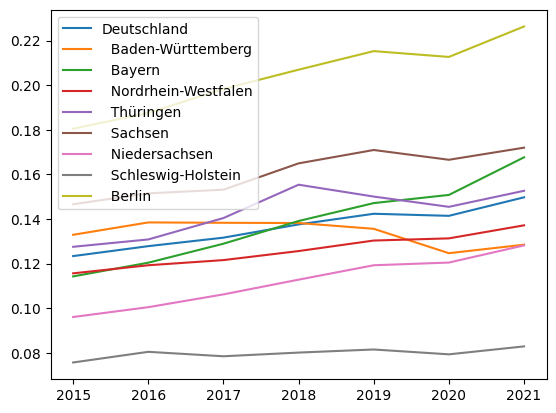

In [35]:
for region in [
    "Deutschland",
    "  Baden-Württemberg",
    "  Bayern",
    "  Nordrhein-Westfalen",
    "  Thüringen",
    "  Sachsen",
    "  Niedersachsen",
    "  Schleswig-Holstein",
    "  Berlin",
]:
    plt.plot(
        ratio_international[
            ratio_international.index.get_level_values(0) == region
        ].year,
        ratio_international[
            ratio_international.index.get_level_values(0) == region
        ].ratio_international,
        label=region,
    )
plt.legend()

### load shape file

In [38]:

path_to_data = "./data/VG2500_LAN.shp"
gdf = geopandas.read_file(path_to_data)

In [39]:
gdf.loc[:, "area"] = gdf.area

<Axes: >

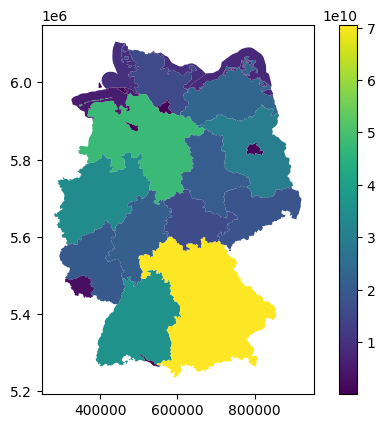

In [40]:
gdf.plot("area", legend=True)

In [41]:
gdf.GEN

0               Schleswig-Holstein
1                          Hamburg
2                    Niedersachsen
3                           Bremen
4              Nordrhein-Westfalen
5                           Hessen
6                  Rheinland-Pfalz
7                Baden-Württemberg
8                           Bayern
9                         Saarland
10                          Berlin
11                     Brandenburg
12          Mecklenburg-Vorpommern
13                         Sachsen
14                  Sachsen-Anhalt
15                       Thüringen
16              Schleswig-Holstein
17                         Hamburg
18                   Niedersachsen
19                   Niedersachsen
20                          Bremen
21          Mecklenburg-Vorpommern
22    Baden-Württemberg (Bodensee)
23               Bayern (Bodensee)
Name: GEN, dtype: object

In [42]:
gdf.AGS = gdf.AGS.astype(str)

### merge with geodataframe and plot

In [43]:
year = 2015

gdf_merged = pd.merge(
    left=gdf,
    right=ratio_international[ratio_international.year == year],
    left_on="AGS",
    right_on="Kreise und kreisfreie Städte_Code",
)
gdf_merged.ratio_international

0     0.075698
1     0.075698
2     0.111490
3     0.111490
4     0.096085
5     0.096085
6     0.096085
7     0.145414
8     0.145414
9     0.115662
10    0.138366
11    0.104924
12    0.132946
13    0.132946
14    0.114288
15    0.114288
16    0.138887
17    0.180502
18    0.151432
19    0.073169
20    0.073169
21    0.146635
22    0.125651
23    0.127564
Name: ratio_international, dtype: float64

<Axes: >

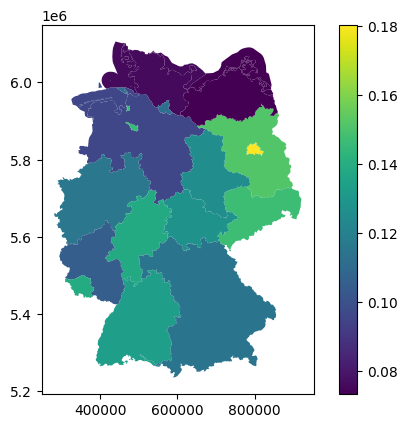

In [44]:
gdf_merged.plot(
    "ratio_international", legend=True, missing_kwds={"color": "lightgrey"}
)

<Axes: >

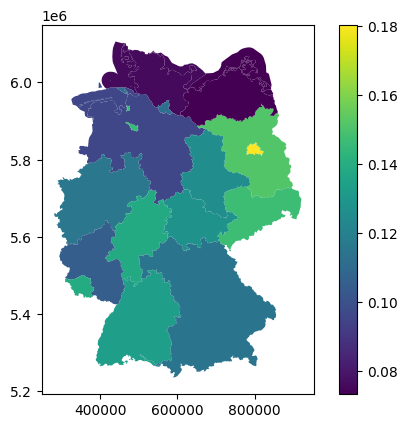

In [45]:
ear = 2018
gdf_merged = pd.merge(
    left=gdf,
    right=ratio_international[ratio_international.year == year],
    left_on="AGS",
    right_on="Kreise und kreisfreie Städte_Code",
)
gdf_merged.ratio_international
gdf_merged.plot(
    "ratio_international", legend=True, missing_kwds={"color": "lightgrey"}
)

<Axes: >

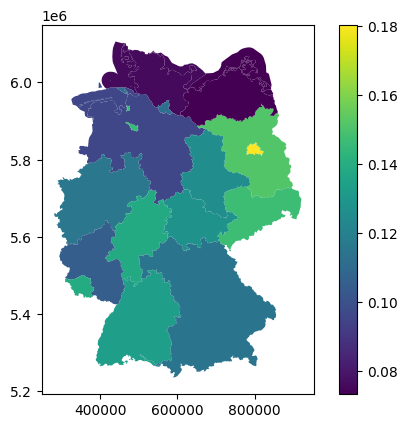

In [46]:
ear = 2021
gdf_merged = pd.merge(
    left=gdf,
    right=ratio_international[ratio_international.year == year],
    left_on="AGS",
    right_on="Kreise und kreisfreie Städte_Code",
)
gdf_merged.ratio_international
gdf_merged.plot(
    "ratio_international", legend=True, missing_kwds={"color": "lightgrey"}
)

## Outlook

- `quality=on`